In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing

In [2]:
df = pd.read_csv('crop_yield.csv')
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1356.2,22778368.48,74196.64,1.261818


In [3]:
df = df.drop_duplicates()

In [4]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [6]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [7]:
# Find all zero values in the DataFrame
zero_values = df == 0


rows_with_zeros = df[zero_values.any(axis=1)]# Display rows where any column has a zero value
rows_with_zeros

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
92,Cardamom,1997,Whole Year,West Bengal,2674.0,7,1852.9,254484.58,828.940,0.0
125,Sunflower,1997,Whole Year,West Bengal,278.0,1,1852.9,26457.26,86.180,0.0
1058,Soyabean,2002,Kharif,Andhra Pradesh,41284.0,0,648.1,3908356.28,10321.000,0.0
1134,other oilseeds,2002,Whole Year,Kerala,2253.0,0,2511.2,213291.51,563.250,0.0
1135,Arecanut,2002,Whole Year,Tamil Nadu,4956.0,0,315.9,469184.52,1239.000,0.0
...,...,...,...,...,...,...,...,...,...,...
17157,Wheat,2019,Kharif,Telangana,1.0,0,1031.7,171.76,0.370,0.0
18005,Tobacco,2012,Kharif,Jammu and Kashmir,1.0,0,1116.7,150.80,0.310,0.4
18122,Tobacco,2014,Kharif,Jammu and Kashmir,1.0,0,1278.4,150.96,0.330,0.4
18226,Horse-gram,2016,Rabi,Jammu and Kashmir,1.0,0,902.8,153.25,0.350,0.4


In [8]:
df= df[~(df == 0).any(axis=1)]

Feature Engineering

In [9]:
# convert yield to 
#df['Yield'] = df['Yield'] * df['Area']

Data Visualizations

In [10]:
features = ['Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'] 

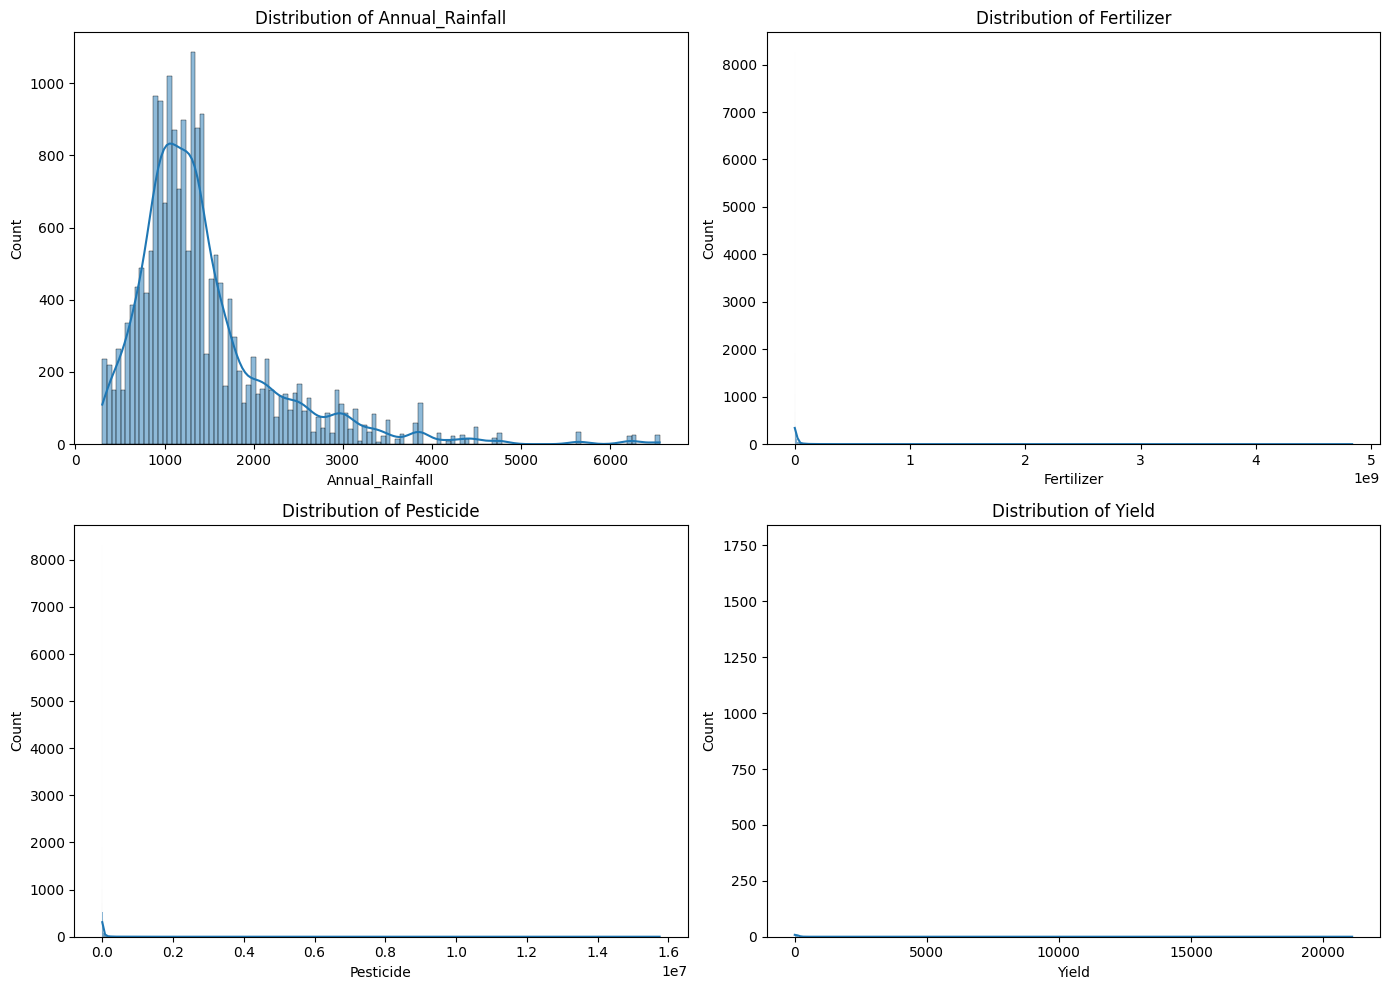

In [11]:


#Histogram of Each Feature

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


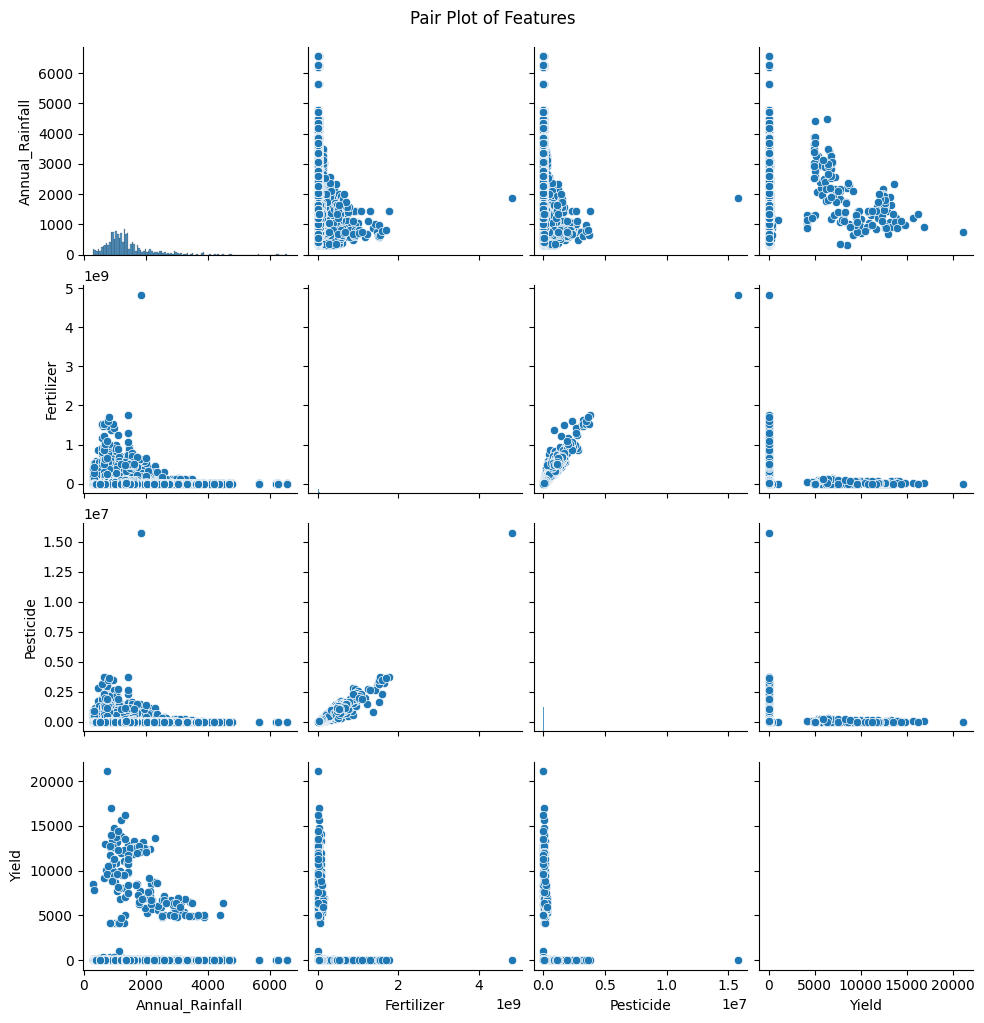

In [12]:
#pair plot

sns.pairplot(df[features])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

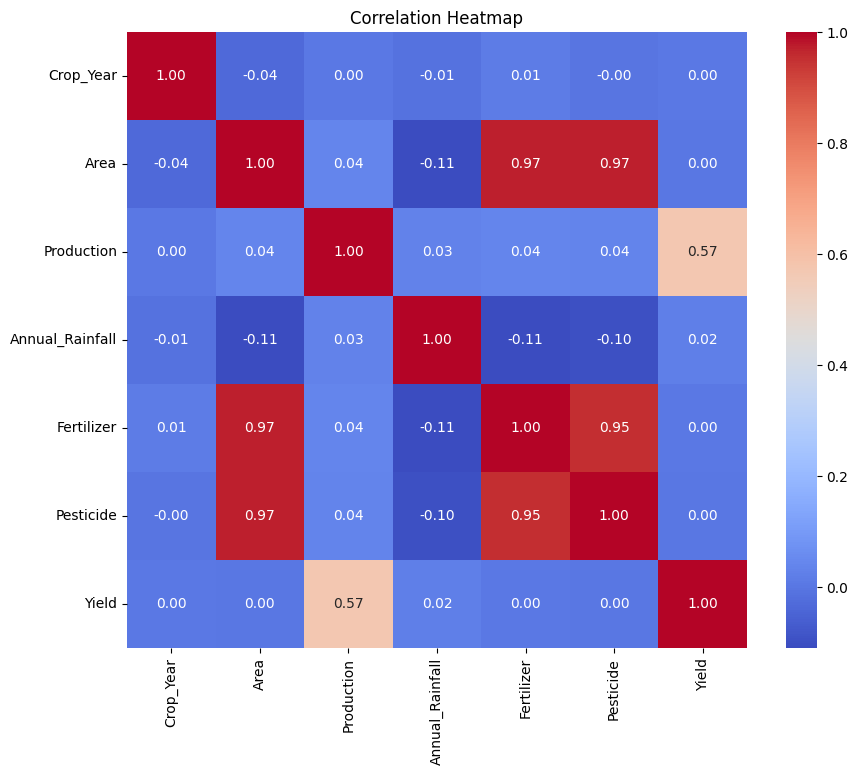

In [13]:
#Correlation Matrix with Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


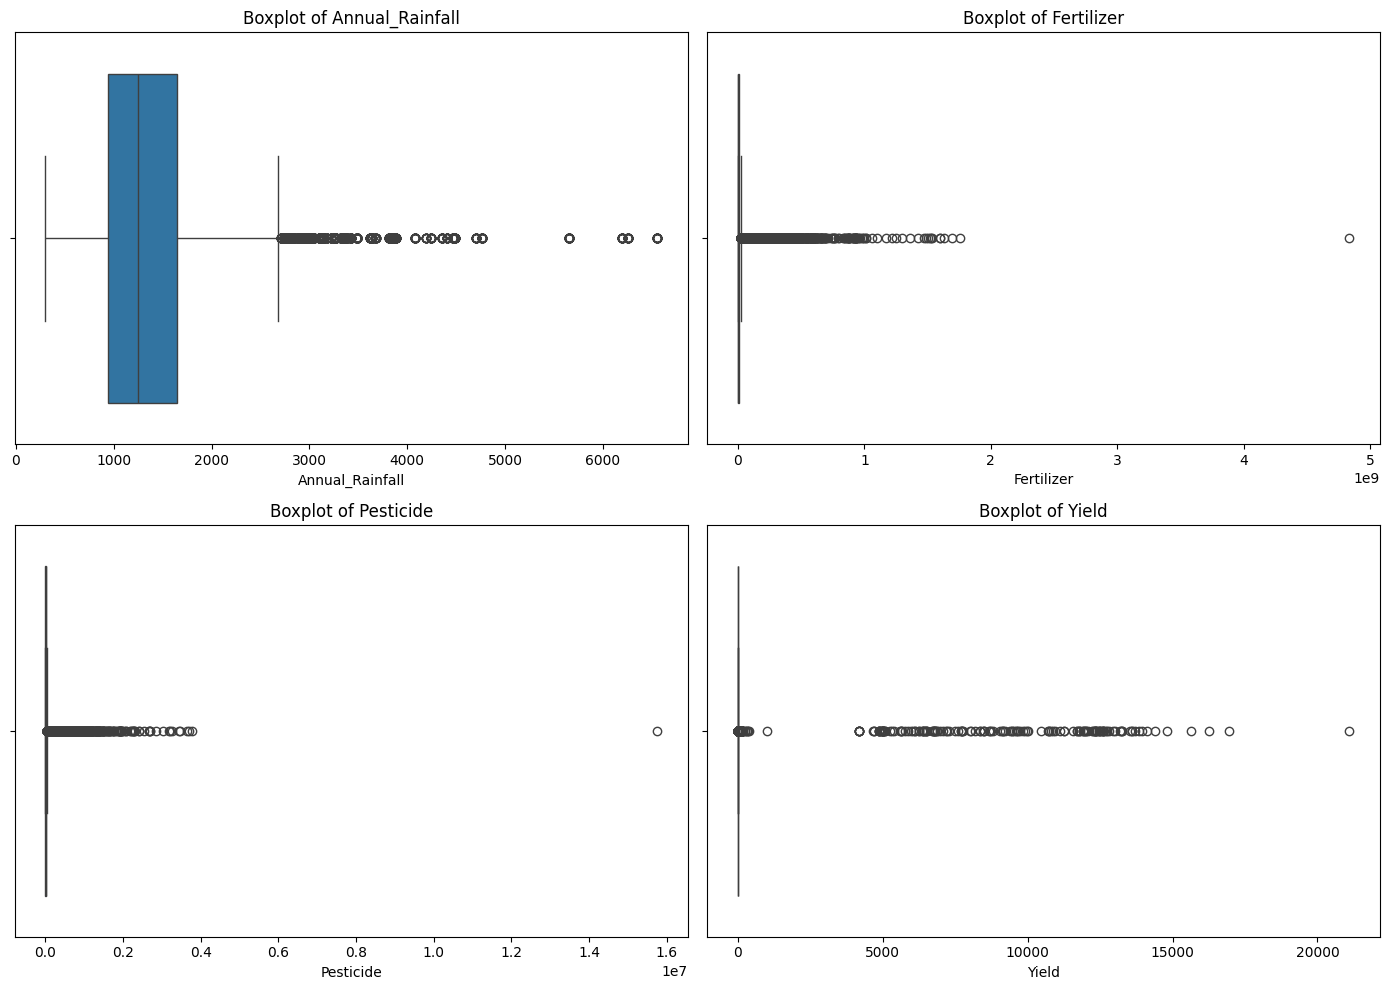

In [14]:
#Boxplots to Check for Outliers
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


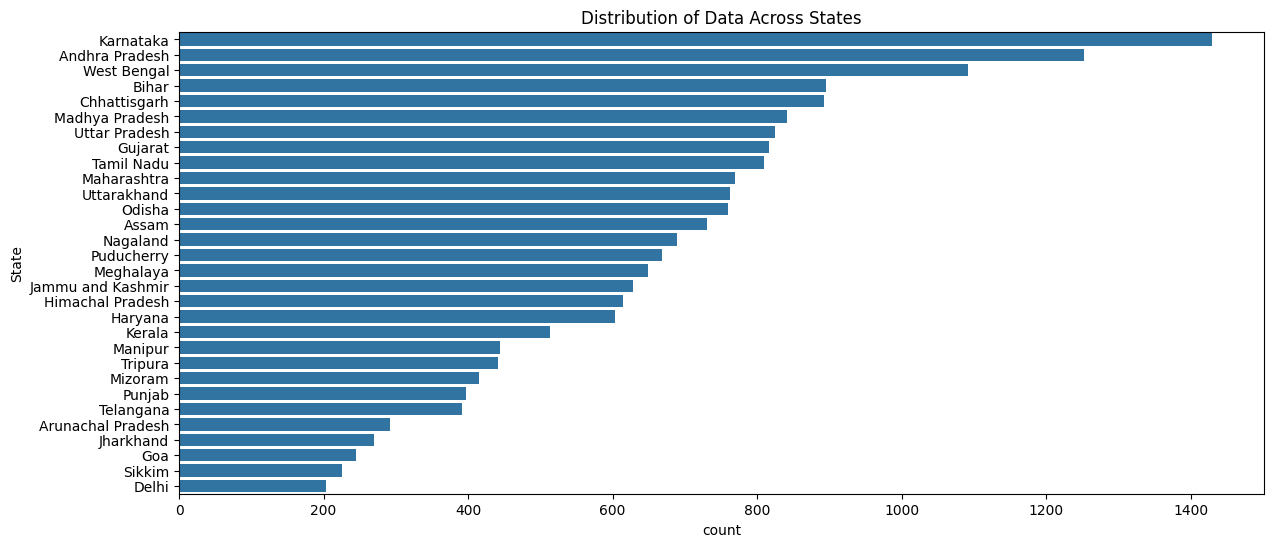

In [15]:
#State-wise Distribution
plt.figure(figsize=(14, 6))
sns.countplot(y='State', data=df, order=df['State'].value_counts().index)
plt.title('Distribution of Data Across States')
plt.show()


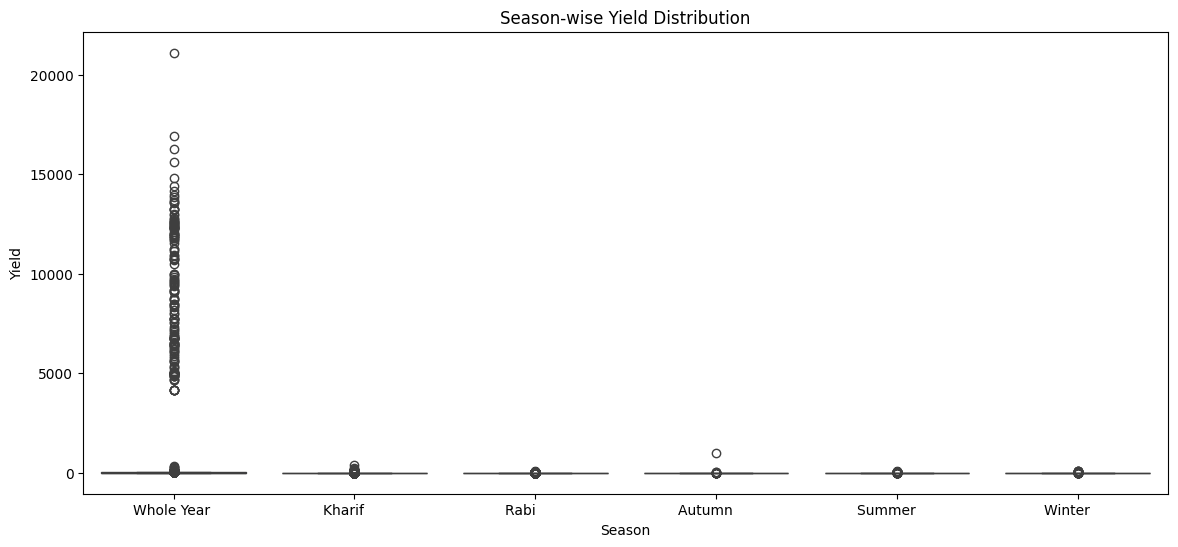

In [16]:
#Season-wise Analysis
plt.figure(figsize=(14, 6))
sns.boxplot(x='Season', y='Yield', data=df)
plt.title('Season-wise Yield Distribution')
plt.show()


C:\Users\sandh\AppData\Local\Temp\ipykernel_14464\609371956.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Crop_Year', y='Yield', data=df, ci=None)


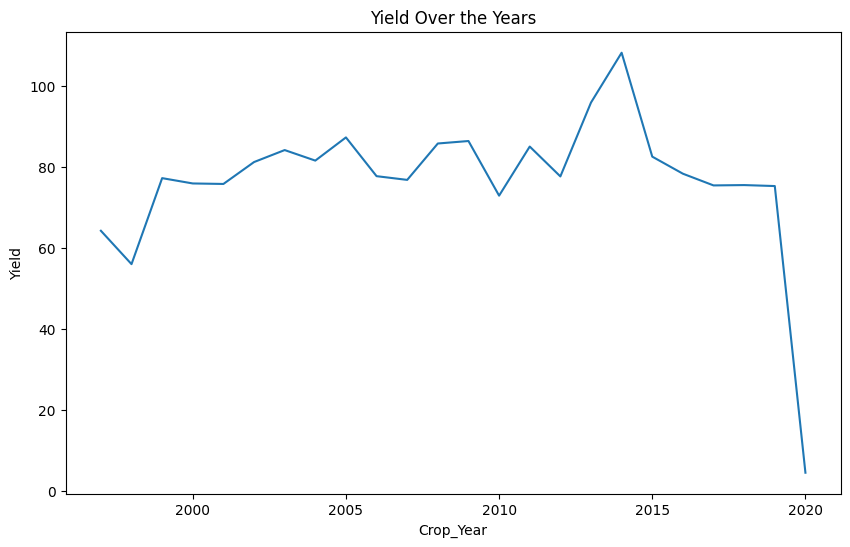

In [17]:
#Time Series Plot 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Crop_Year', y='Yield', data=df, ci=None)
plt.title('Yield Over the Years')
plt.show()


# Pre Processing

In [18]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [19]:
#Outlier Treatment
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd


# Scale the numerical columns
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols, index=df.index)

# Apply DBSCAN to detect outliers
dbscan = DBSCAN(eps=0.5, min_samples=20)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(df_num_scaled)

# Create a DataFrame to store the DBSCAN labels
df_num_scaled['dbscan_label'] = dbscan_labels

# Identify inliers (label 0) and outliers (label -1)
inliers = df_num_scaled[df_num_scaled['dbscan_label'] != -1]
outliers = df_num_scaled[df_num_scaled['dbscan_label'] == -1]

# Remove outliers from the original DataFrame
df_cleaned = df.loc[inliers.index]

# If you need to apply the same transformation to the categorical columns
# Optionally, apply one-hot encoding or any other preprocessing as needed

# Display results
print("Number of inliers:", len(inliers))
print("Number of outliers:", len(outliers))
print("Cleaned DataFrame:")
print(df_cleaned)


Number of inliers: 18814
Number of outliers: 759
Cleaned DataFrame:
                Crop  Crop_Year       Season              State      Area  \
0           Arecanut       1997  Whole Year               Assam   73814.0   
1          Arhar/Tur       1997  Kharif                   Assam    6637.0   
2        Castor seed       1997  Kharif                   Assam     796.0   
4       Cotton(lint)       1997  Kharif                   Assam    1739.0   
5       Dry chillies       1997  Whole Year               Assam   13587.0   
...              ...        ...          ...                ...       ...   
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       

In [20]:
# Extracting x and y variables
X = df_cleaned.drop('Yield', axis = 1)
y = df_cleaned['Yield']

In [21]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [22]:
#Scaling and Encoding

from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Initialize the scaler and encoder
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap

# Scale the numerical columns
X_num_scaled = pd.DataFrame(scaler.fit_transform(X[num_cols]), columns=num_cols, index=X.index)

# OneHotEncode the categorical columns
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X[cat_cols]), 
                              columns=encoder.get_feature_names_out(cat_cols), 
                              index=X.index)

# Combine the scaled numerical and encoded categorical features
X_processed = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

# Display the processed DataFrame
X_processed


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,-1.869140,-0.057394,-0.120459,0.735152,-0.161703,-0.001851,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.869140,-0.396314,-0.138363,0.735152,-0.402746,-0.376990,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.869140,-0.425783,-0.139968,0.735152,-0.423705,-0.409608,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.869140,-0.421025,-0.139702,0.735152,-0.420321,-0.404342,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-1.869140,-0.361250,-0.136853,0.735152,-0.377808,-0.338178,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19684,-1.715188,-0.409618,-0.139287,0.061618,-0.411661,-0.393157,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19685,-1.715188,-0.424754,-0.138943,0.061618,-0.422836,-0.408829,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19686,-1.869140,1.138662,0.011767,-0.110964,0.688943,1.322022,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19687,-1.869140,0.961390,-0.138087,-0.110964,0.562865,1.125805,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Splitting
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_processed,y, test_size=0.2, random_state=15)

# Model 1

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_pred,y_test)

print(mse,r2)

35.17259327055914 0.6045851969610982


# Model 2


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Predict using the best model
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Best parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


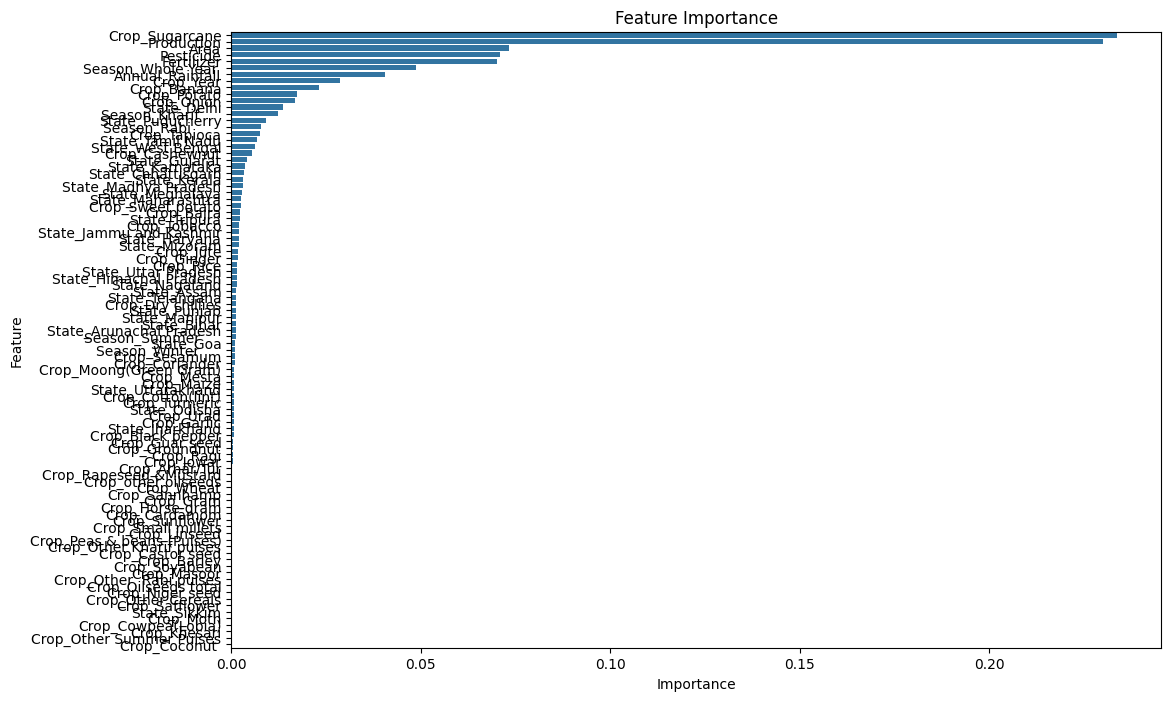

In [48]:
#Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature importance from the best model
importances = best_rf.feature_importances_
features = X_train.columns 

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


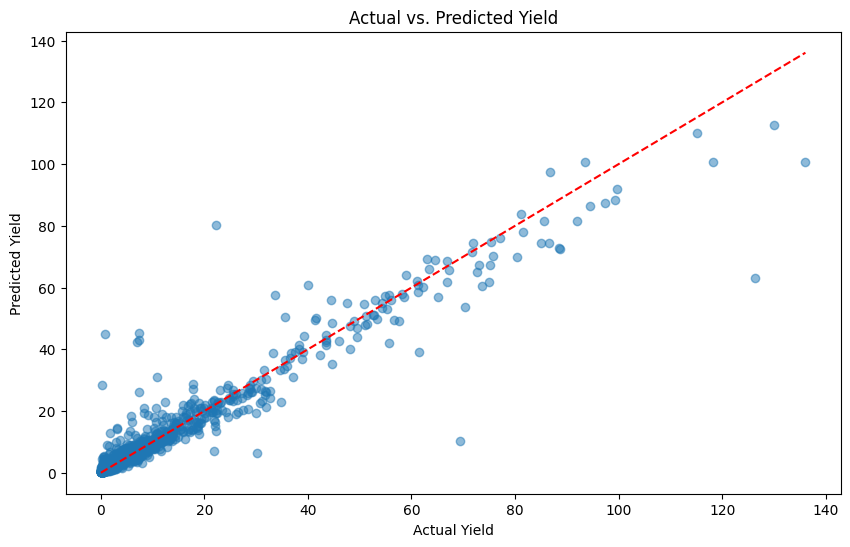

In [50]:
 #Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield')
plt.show()


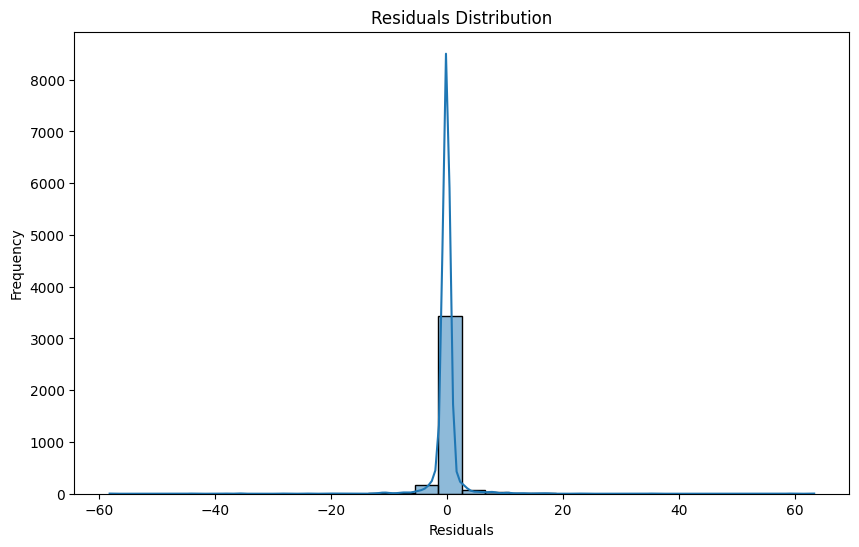

In [52]:
#Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()


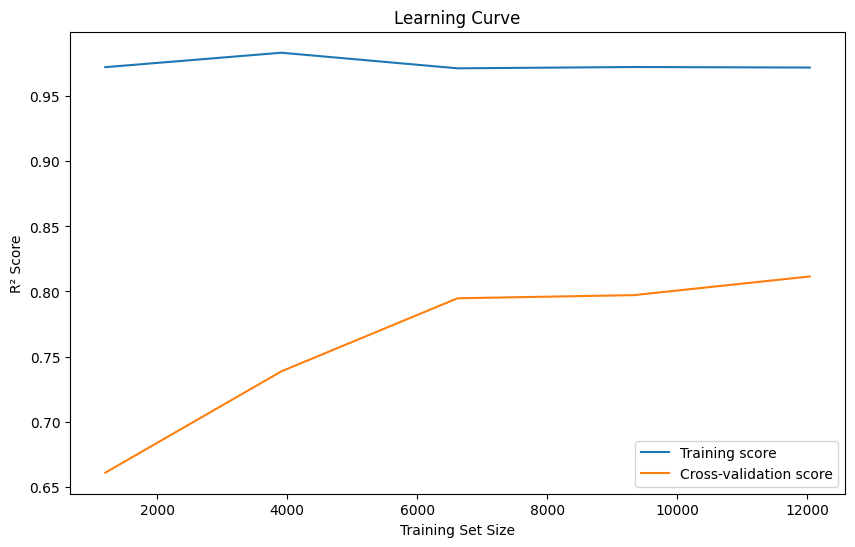

In [54]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_rf, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

# Calculate mean and std
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


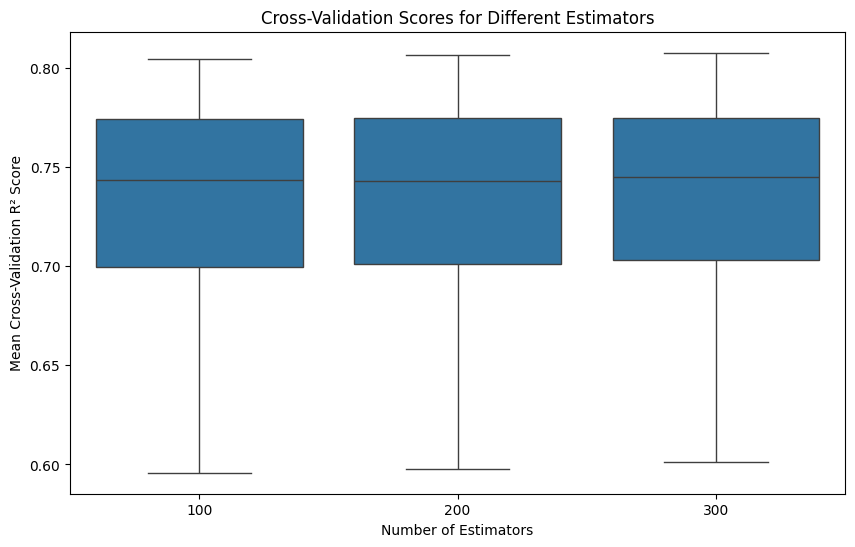

In [56]:
#Cross-Validation Score Distribution
cv_results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
sns.boxplot(x='param_n_estimators', y='mean_test_score', data=cv_results)
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Cross-Validation R² Score')
plt.title('Cross-Validation Scores for Different Estimators')
plt.show()


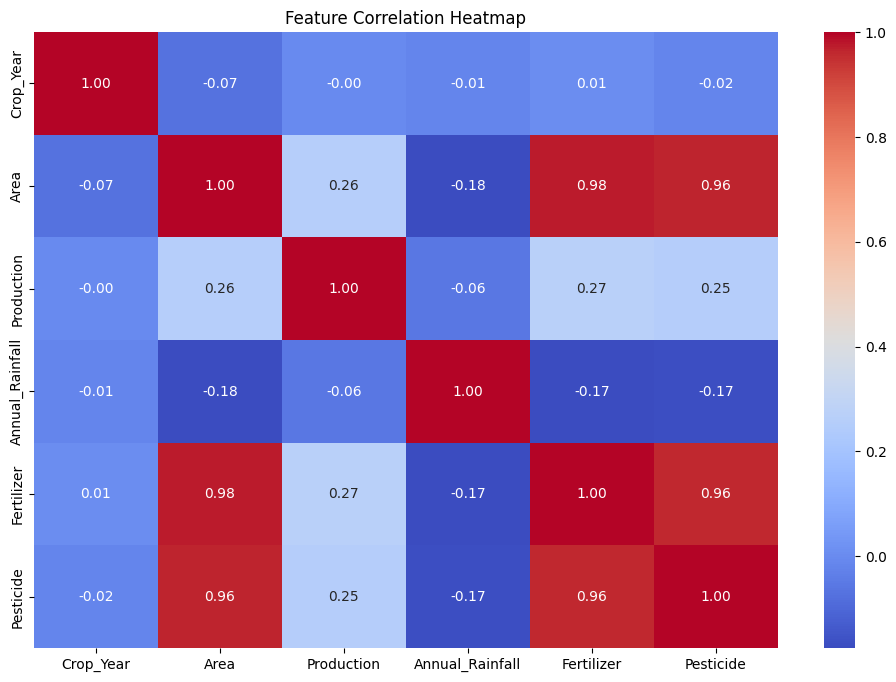

In [58]:
#Correlation Heatmap
numeric_X = X.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()
